In [2]:
# Jupyter magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Experiment: 0
True coef:(38: 1.00)
Direct coef:(1: 0.02), (2: 0.05), (6: 0.09), (7: 0.03), (11: 0.09), (13: 0.20), (14: 0.06), (18: 0.00), (19: 0.13), (23: 0.04), (24: 0.02), (28: 0.09), (29: 0.05), (30: 0.02), (33: 0.08), (37: 0.04), (38: 0.98), (40: 0.02), (42: 0.03), (44: 0.11), (45: 0.13), (46: 0.01), (47: 0.06), (48: 0.06), (49: 0.06)
early stopping at iter:3133
Ortho coef:(13: 0.09), (38: 0.78), (45: 0.03)
Experiment: 1
True coef:(11: 1.00)
Direct coef:(3: 0.02), (9: 0.06), (10: 0.00), (11: 1.02), (12: 0.00), (14: 0.03), (18: 0.05), (20: 0.02), (21: 0.04), (22: 0.04), (23: 0.07), (25: 0.10), (28: 0.03), (32: 0.09), (33: 0.03), (35: 0.00), (39: 0.10), (41: 0.03), (43: 0.03), (44: 0.09), (45: 0.10), (46: 0.08), (49: 0.01)
early stopping at iter:3608
Ortho coef:(11: 0.79), (45: 0.04)
Experiment: 2
True coef:(43: 1.00)
Direct coef:(0: 0.06), (1: 0.01), (7: 0.09), (8: 0.07), (9: 0.04), (10: 0.08), (11: 0.06), (14: 0.03), (17: 0.00), (18: 0.08), (19: 0.01), (20: 0.00), (21: 0.05), (22:

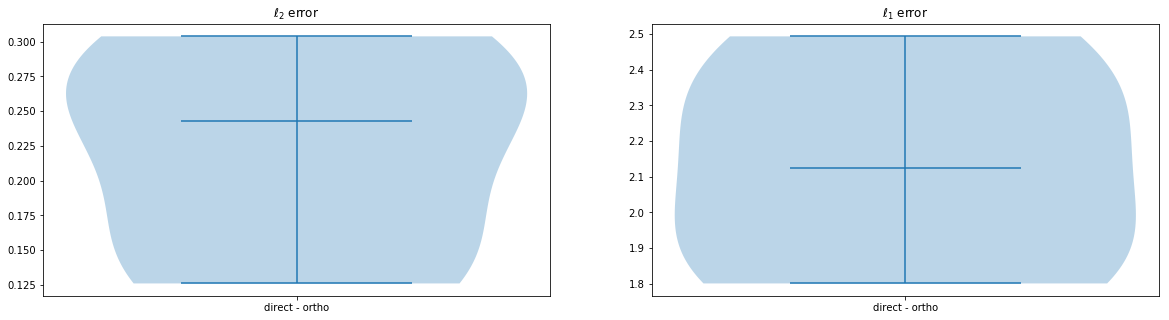

In [16]:
from sklearn.linear_model import Lasso, MultiTaskLasso, MultiTaskLassoCV, LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from logistic_te import gen_data, direct_fit, dml_fit


def main():
    n_samples = 5000 # samples used for estimation
    dim_x = 50 # dimension of controls x
    dim_z = 50 # dimension of variables used for heterogeneity (subset of x)
    kappa_x = 25 # support size of control function
    kappa_theta = 1 # support size of target parameter
    sigma_eta = 5 # variance of error in secondary moment equation
    lambda_coef = 1 # coeficient in front of the asymptotic rate for regularization lambda

    l2_direct = []
    l2_ortho = []
    l2_cross_ortho = []
    l1_direct = []
    l1_ortho = []
    l1_cross_ortho = []
    for step in range(5):
        print("Experiment: {}".format(step))
        # Generate data
        x, t, z, y, support_x, support_theta, alpha_x, beta_x, theta =\
                gen_data(n_samples, dim_x, dim_z, kappa_x, kappa_theta, sigma_eta)
        true_coef = np.zeros((dim_z, 1))
        true_coef[support_theta] = theta
        print('True coef:' + ', '.join(["({}: {:.2f})".format(ind, c) for ind, c in enumerate(true_coef.flatten()) if c>0.001]))
        
        # Direct lasso for all coefficients
        model_y, model_t= direct_fit(x, t, z, y)
        print('Direct coef:' + ', '.join(["({}: {:.2f})".format(ind, c) for ind, c in enumerate(model_y.coef_.flatten()[:dim_z]) if c>0.001]))
        l1_direct.append(np.linalg.norm(model_y.coef_.flatten()[:z.shape[1]] - true_coef.flatten(), ord=1))
        l2_direct.append(np.linalg.norm(model_y.coef_.flatten()[:z.shape[1]].flatten() - true_coef.flatten(), ord=2))
        
        # Orthogonal lasso estimation
        ortho_coef = dml_fit(x, t, z, y)
        l1_ortho.append(np.linalg.norm(ortho_coef.flatten() - true_coef.flatten(), ord=1))
        l2_ortho.append(np.linalg.norm(ortho_coef.flatten() - true_coef.flatten(), ord=2))
        print('Ortho coef:' + ', '.join(["({}: {:.2f})".format(ind, c) for ind, c in enumerate(ortho_coef) if c>0.001]))

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.violinplot([np.array(l2_direct) - np.array(l2_ortho)], showmedians=True)
    plt.xticks([1], ['direct - ortho'])
    plt.title('$\ell_2$ error')
    plt.subplot(1,2,2)
    plt.violinplot([np.array(l1_direct) - np.array(l1_ortho)], showmedians=True)
    plt.xticks([1], ['direct - ortho'])
    plt.title('$\ell_1$ error')
    plt.show()
    
main()